# Solution to exercises week 43-44
#### Brage Wiseth, Eirik Jahr, Felix Cameren

In [47]:
import jax.numpy as np
import jax
from matplotlib import pyplot as plt
from jax.lib import xla_bridge
print("jax backend {}".format(xla_bridge.get_backend().platform))

key = jax.random.PRNGKey(2024)


jax backend gpu


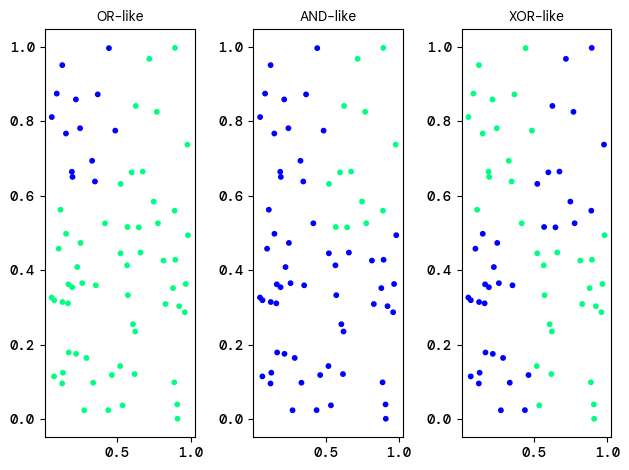

In [48]:
# we can generate a OR-like , AND-like and XOR-like dataset with float values
x = jax.random.uniform(key, shape=(70,2), minval=0, maxval=1)

t_or = (x[:,0] >= 0.5) | (x[:,1] < 0.6)
t_and = (x[:,0] >= 0.5) & (x[:,1] > 0.5)
t_xor = (x[:,0] >= 0.5) ^ (x[:,1] > 0.5)


fig, ax = plt.subplots(1, 3)
ax[0].scatter(x[:,0],x[:,1], s=10, c=t_or, cmap='winter')
ax[0].set_title("OR-like", font='sans')
ax[1].scatter(x[:,0],x[:,1], s=10, c=t_and, cmap='winter')
ax[1].set_title("AND-like", font='sans')
ax[2].scatter(x[:,0],x[:,1], s=10, c=t_xor, cmap='winter')
ax[2].set_title("XOR-like", font='sans')
fig.tight_layout()
plt.show()


In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler() # not using it for now

X_train, X_test, t_or_train, t_or_test = train_test_split(x, t_or, test_size=0.2, random_state=1234)
# same seed so we only need x_train and x_test from the first split
_ , _,   t_and_train , t_and_test = train_test_split(x, t_and, test_size=0.2, random_state=1234)
_ , _,   t_xor_train , t_xor_test = train_test_split(x, t_xor, test_size=0.2, random_state=1234)

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

t_or_train = np.asarray(t_or_train).reshape(-1, 1)
t_or_test = np.asarray(t_or_test).reshape(-1, 1)
t_and_train = np.asarray(t_and_train).reshape(-1, 1)
t_and_test = np.asarray(t_and_test).reshape(-1, 1)
t_xor_train = np.asarray(t_xor_train).reshape(-1, 1)
t_xor_test = np.asarray(t_xor_test).reshape(-1, 1)


### ADAMLL is a local library for machine learning algorithms it contains activation functions, cost functions, and optimization algorithms from previous exercises.

In [52]:
import ADAMLL as ada


#### test and compare with jax to verify the derivations, not used in the analysis

In [58]:


def build_forward(architecture):
    architecture = architecture[1:]
    acitvation_functions = [l[-1] for l in architecture]

    print(acitvation_functions)

    @jax.jit
    def forward(network, inputs):
        activations = [inputs]
        for i in range(len(network)): 
            activations.append(acitvation_functions[i](np.dot(activations[-1], network[i]['w']) + network[i]['b']))
        return activations  

    return forward


def init_network_params(architecture, key):
    layer_sizes = [l[0] for l in architecture]
    keys = jax.random.split(key, len(layer_sizes) - 1)
    return [{'w': jax.random.normal(k, (in_size, out_size)) * np.sqrt(2 / in_size),
             'b': np.zeros(out_size)}
            for k, in_size, out_size in zip(keys, layer_sizes[:-1], layer_sizes[1:])]



sigmoid = ada.activations.sigmoid

arch = [[2], [2,sigmoid], [1, lambda x:x] ]
forward = build_forward(arch)

key = jax.random.PRNGKey(2024)
params = init_network_params(arch, key)

y = forward(params, X_train)
# key, subkey = jax.random.split(key)
# params = ada.init_network_params([2,1], subkey)
# print(params)
# activations = forward_propagate(params, x)
# print(activations)
# print(t_train)
# grads = backprop_one_hidden(params, t_train, forward_propagate(params, X_train))
# grads = single_layer_gradients(params, t_train, forward_propagate(params, X_train))

# print(grads)
# print("#####")
# print(jax.grad(loss_all_args,argnums=(0,1,2,3))(params[0]['w'], params[1]['w'], params[0]['b'], params[1]['b'], X_train, t_train))

[<function sigmoid at 0x7fd5803eeef0>, <function <lambda> at 0x7fd3a1c65f30>]
[Array([[0.65868545, 0.4475187 ],
       [0.1671691 , 0.36246347],
       [0.12985301, 0.12546182],
       [0.8935224 , 0.9964658 ],
       [0.46288812, 0.11916804],
       [0.6466863 , 0.51523614],
       [0.9774512 , 0.73711646],
       [0.05284655, 0.32702553],
       [0.5693002 , 0.51612675],
       [0.90824974, 0.04039347],
       [0.32859564, 0.69373834],
       [0.6258012 , 0.8407873 ],
       [0.05385566, 0.8109505 ],
       [0.7482002 , 0.5843719 ],
       [0.36682105, 0.8717493 ],
       [0.5227511 , 0.63178957],
       [0.51926076, 0.1432774 ],
       [0.566728  , 0.4133638 ],
       [0.7179043 , 0.9670503 ],
       [0.2895193 , 0.16506648],
       [0.43856084, 0.02508616],
       [0.12626505, 0.31499076],
       [0.622085  , 0.2358793 ],
       [0.98134863, 0.49419582],
       [0.5362165 , 0.03799117],
       [0.89085793, 0.5598825 ],
       [0.19488549, 0.65042293],
       [0.19051266, 0.6642709 

## Running the Neural Network

#### No hidden layer

In [ ]:

sgd = NN(architecture=[[2,1],[ sigmoid ]], eta=0.1, epochs=400, tol=0.001, optimizer='sgd', gamma=0.9,backwards=single_layer_gradients)

loss_or, params_or = sgd.fit(X_train, t_or_train, X_test, t_or_test, batch_size=4)
loss_and, params_and = sgd.fit(X_train, t_and_train, X_test, t_and_test, batch_size=4)
loss_xor, params_xor = sgd.fit(X_train, t_xor_train, X_test, t_xor_test, batch_size=4)

[{'b': Traced<ShapedArray(float32[1])>with<DynamicJaxprTrace(level=1/0)>, 'w': Traced<ShapedArray(float32[2,1])>with<DynamicJaxprTrace(level=1/0)>}]
[Traced<ShapedArray(float32[4,2])>with<DynamicJaxprTrace(level=1/0)>]


TypeError: dot_general requires contracting dimensions to have the same shape, got (1,) and (2,).

In [ ]:
def predict(activations):
    return np.round(activations)


y_or = forward_propagate(params_or, x)[-1]
y_and = forward_propagate(params_and, x)[-1]
y_xor = forward_propagate(params_xor, x)[-1]


y_or = predict(y_or)
y_and = predict(y_and)
y_xor = predict(y_xor)


fig , ax = plt.subplots(1, 3)
ax[0].scatter(x[:,0], x[:,1], s=20, c=y_or, cmap='winter', marker='x')
ax[0].set_title("OR-like prediction", font='sans')
ax[1].scatter(x[:,0], x[:,1], s=20, c=y_and, cmap='winter', marker='x')
ax[1].set_title("AND-like prediction", font='sans')
ax[2].scatter(x[:,0], x[:,1], s=20, c=y_xor, cmap='winter', marker='x')
ax[2].set_title("XOR-like prediction", font='sans')
fig.tight_layout()


fig, ax = plt.subplots(1, 3)
ax[0].plot(loss_or)
ax[0].set_title("OR-like loss", font='sans')
ax[1].plot(loss_and)
ax[1].set_title("AND-like loss", font='sans')
ax[2].plot(loss_xor)
ax[2].set_title("XOR-like loss", font='sans')
fig.tight_layout()
plt.show()

### One hidden layer

In [ ]:
sigmoid = ada.activations.sigmoid

sgd = NN(architecture=[[2,4, 1],[ sigmoid, sigmoid ]], eta=0.1, epochs=200, tol=0.001, optimizer='sgd', gamma=0.9,
backwards = backprop_one_hidden)
loss_or, params_or = sgd.fit(X_train, t_or_train, X_test, t_or_test, batch_size=4)
loss_and, params_and = sgd.fit(X_train, t_and_train, X_test, t_and_test, batch_size=4)
loss_xor, params_xor = sgd.fit(X_train, t_xor_train, X_test, t_xor_test, batch_size=4)

In [ ]:
y_or = forward_propagate(params_or, x)[-1]
y_and = forward_propagate(params_and, x)[-1]
y_xor = forward_propagate(params_xor, x)[-1]


y_or = predict(y_or)
y_and = predict(y_and)
y_xor = predict(y_xor)


fig , ax = plt.subplots(1, 3)
ax[0].scatter(x[:,0], x[:,1], s=20, c=y_or, cmap='winter', marker='x')
ax[0].set_title("OR-like prediction", font='sans')
ax[1].scatter(x[:,0], x[:,1], s=20, c=y_and, cmap='winter', marker='x')
ax[1].set_title("AND-like prediction", font='sans')
ax[2].scatter(x[:,0], x[:,1], s=20, c=y_xor, cmap='winter', marker='x')
ax[2].set_title("XOR-like prediction", font='sans')
fig.tight_layout()


fig, ax = plt.subplots(1, 3)
ax[0].plot(loss_or)
ax[0].set_title("OR-like loss", font='sans')
ax[1].plot(loss_and)
ax[1].set_title("AND-like loss", font='sans')
ax[2].plot(loss_xor)
ax[2].set_title("XOR-like loss", font='sans')
fig.tight_layout()
plt.show()